In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from luwiji.cluster import demo

# Sample data

In [2]:
X1, y1 = demo.blob_data()
X2, y2 = demo.moon_data()
X3, y3 = demo.circle_data()

# Visualize

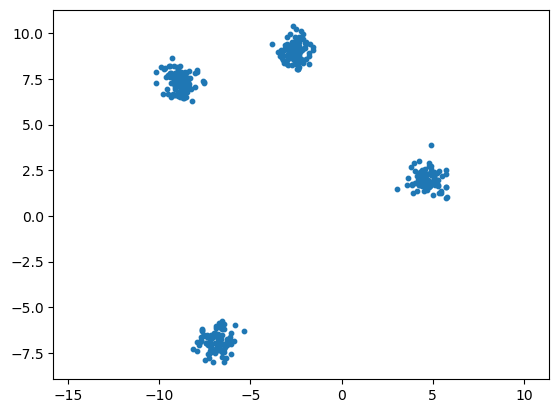

In [7]:
X = X1
plt.scatter(X[:, 0], X[:,1], s=10)
plt.axis("equal");

# Kmeans

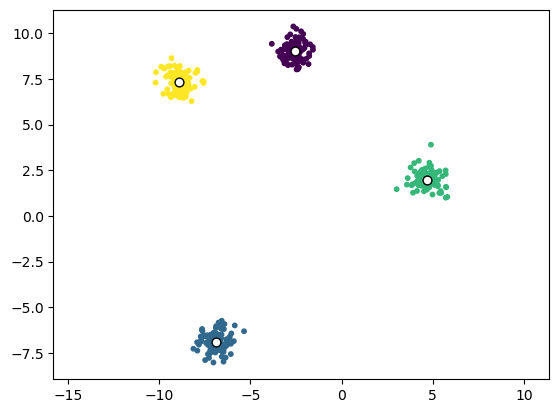

In [27]:
X = X1
kmeans = KMeans(n_clusters=4)
member = kmeans.fit_predict(X)
centre = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:,1], s=10, c=member)
plt.scatter(centre[:, 0], centre[:,1],c='w', edgecolors='k', s=40)
plt.axis("equal");

# Kmeans Weakness
- kesulitan menentukan K
  - solusi : elbow analysis, silhouette score, and others
- hanya untuk data yang bisa di rata - ratakan
  - solusi : K-Modes, K-Medoid, K-Prototype
- solusi tidak selalu optimal
- hanya untuk data linear sparable

# Contoh Moon dataset

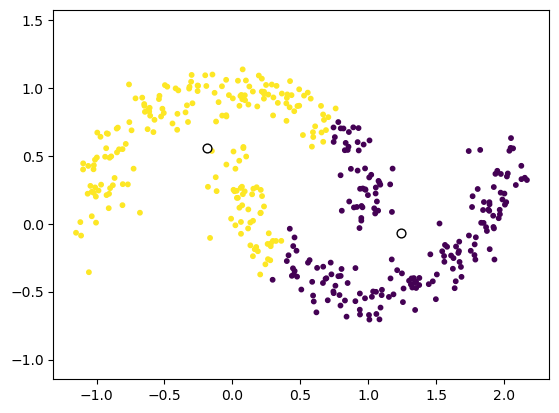

In [35]:
X = X2
kmeans = KMeans(n_clusters=2)
member = kmeans.fit_predict(X)
centre = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:,1], s=10, c=member)
plt.scatter(centre[:, 0], centre[:,1],c='w', edgecolors='k', s=40)
plt.axis("equal");

# Contoh Donut dataset

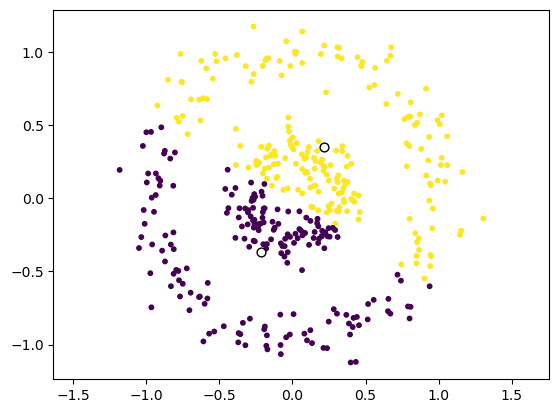

In [29]:
X = X3
kmeans = KMeans(n_clusters=2)
member = kmeans.fit_predict(X)
centre = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:,1], s=10, c=member)
plt.scatter(centre[:, 0], centre[:,1],c='w', edgecolors='k', s=40)
plt.axis("equal");

# Menentukan K (n_clusters) tanpa label -> Inertia / elbow analysis

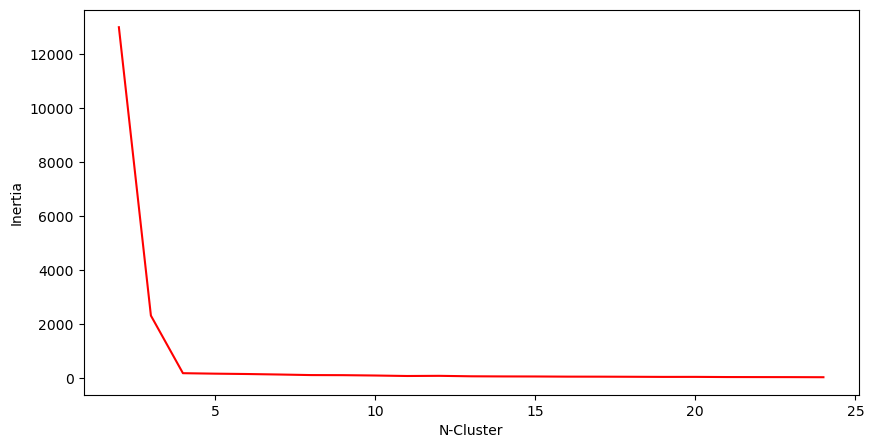

In [33]:
X = X1
score = []
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k)
    member = kmeans.fit_predict(X)
    score.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(2,25), score, 'r-')
plt.ylabel("Inertia")
plt.xlabel("N-Cluster");

# Menentukan K (n_clusters) dan ada label -> Silhouette score

In [32]:
from sklearn.metrics import silhouette_score

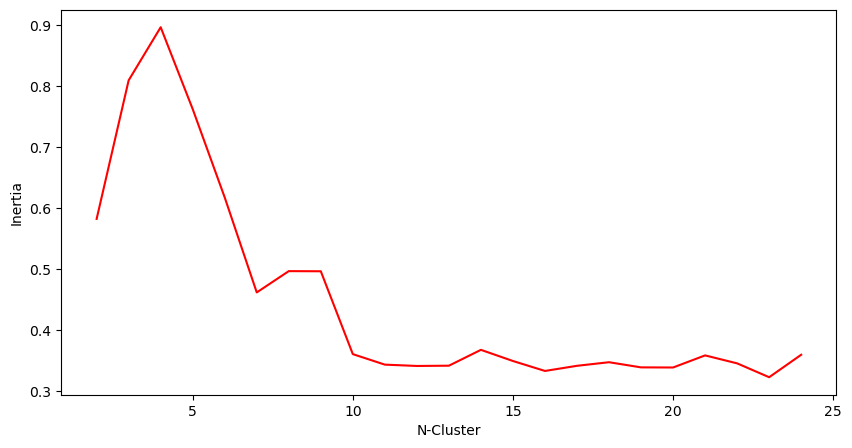

In [34]:
X = X1
score = []
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k)
    member = kmeans.fit_predict(X)

    siluet = silhouette_score(X, member)
    score.append(siluet)

plt.figure(figsize=(10,5))
plt.plot(range(2,25), score, 'r-')
plt.ylabel("Inertia")
plt.xlabel("N-Cluster");

# Beyond Kmeans

## Spectral Clustering

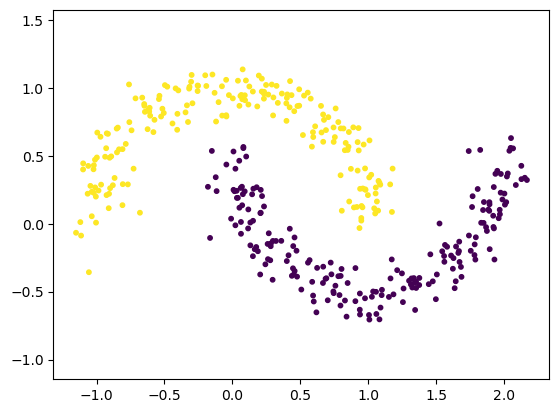

In [39]:
X = X2
sc = SpectralClustering(n_clusters=2, gamma=100)
labels = sc.fit_predict(X) 
plt.scatter(X[:, 0], X[:,1], s=10, c=labels)
plt.axis("equal");

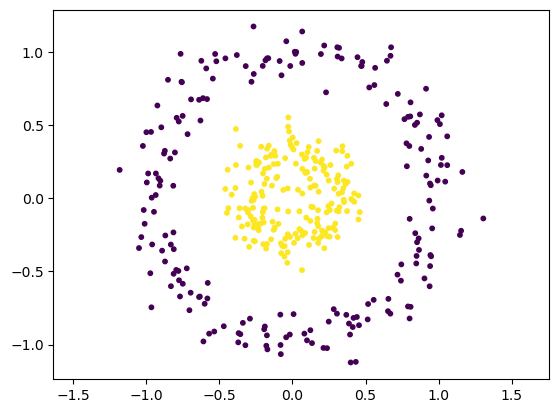

In [40]:
X = X3
sc = SpectralClustering(n_clusters=2, gamma=100)
labels = sc.fit_predict(X) 
plt.scatter(X[:, 0], X[:,1], s=10, c=labels)
plt.axis("equal");

## DBScan

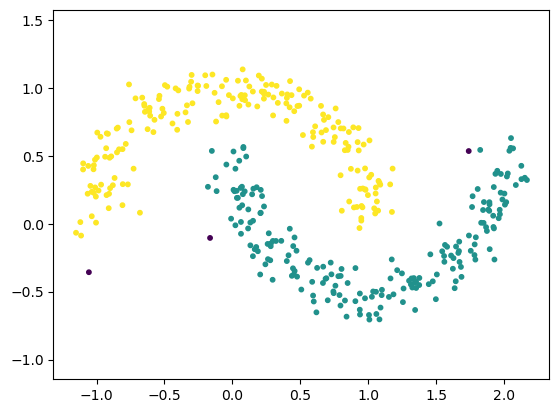

In [47]:
X = X2
dbscan = DBSCAN(eps=0.2)
labels = dbscan.fit_predict(X) 
plt.scatter(X[:, 0], X[:,1], s=10, c=labels)
plt.axis("equal");

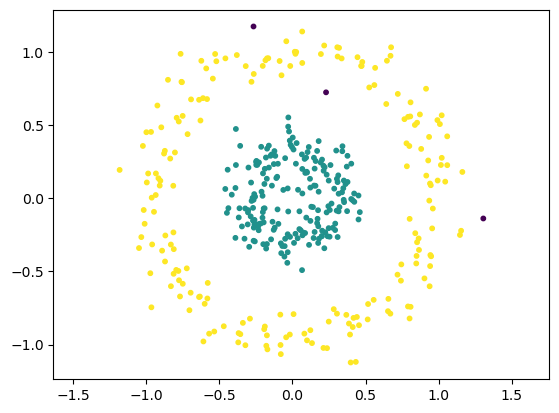

In [49]:
X = X3
dbscan = DBSCAN(eps=0.2)
labels = dbscan.fit_predict(X) 
plt.scatter(X[:, 0], X[:,1], s=10, c=labels)
plt.axis("equal");

## AHC

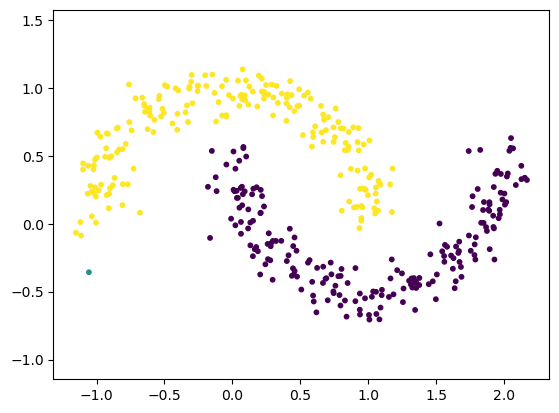

In [56]:
X = X2
ahc = AgglomerativeClustering(n_clusters=3, linkage='single')
labels = ahc.fit_predict(X) 
plt.scatter(X[:, 0], X[:,1], s=10, c=labels)
plt.axis("equal");

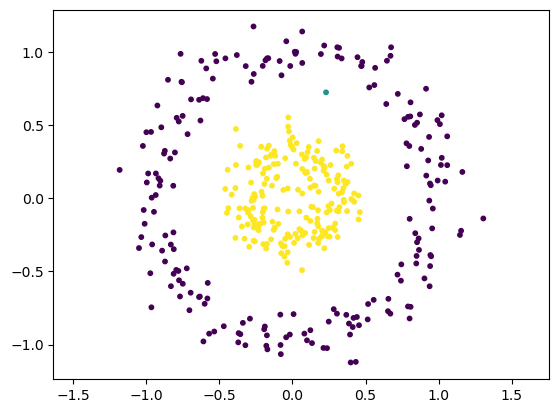

In [59]:
X = X3
ahc = AgglomerativeClustering(n_clusters=3, linkage='single')
labels = ahc.fit_predict(X) 
plt.scatter(X[:, 0], X[:,1], s=10, c=labels)
plt.axis("equal");

# Scipy

In [60]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [61]:
X, y = demo.blob_data(30)

In [62]:
Z = linkage(X)

## Get Membership

In [63]:
labels = fcluster(Z, 4, criterion='maxclust')
labels

array([4, 1, 2, 2, 4, 4, 1, 1, 4, 1, 1, 1, 2, 2, 2, 1, 3, 2, 4, 3, 3, 3,
       3, 2, 2, 4, 3, 4, 4, 3], dtype=int32)

In [64]:
labels = fcluster(Z, 5, criterion='distance')
labels

array([4, 1, 2, 2, 4, 4, 1, 1, 4, 1, 1, 1, 2, 2, 2, 1, 3, 2, 4, 3, 3, 3,
       3, 2, 2, 4, 3, 4, 4, 3], dtype=int32)

## visualize dendogram

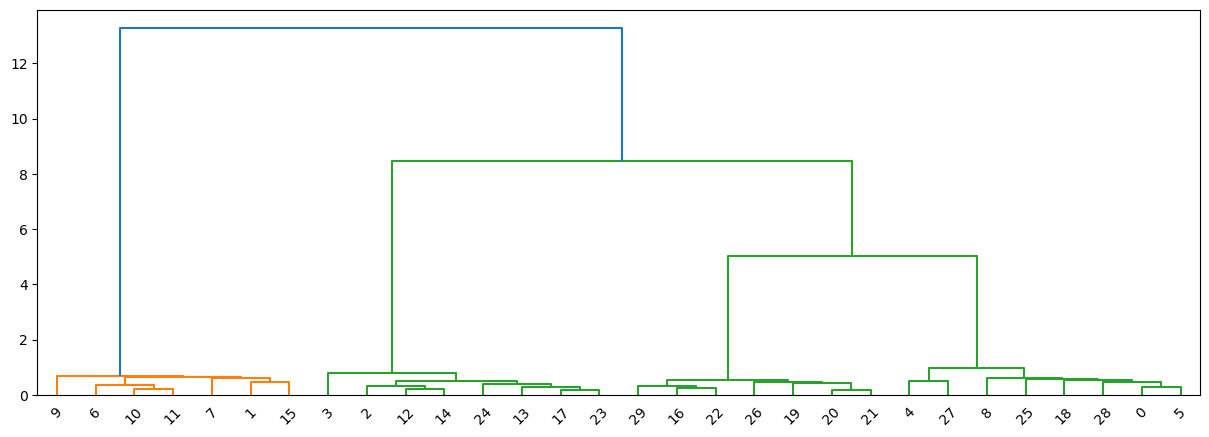

In [65]:
plt.figure(figsize=(15, 5))
dendrogram(Z);